В файле данных (скачать тут) содержатся данные, полученные в ходе исследовании вселенной High Time Resolution Universe Survey (описание признаков можно найти в блоке Attribute Information) с целью определения одного из типа нейтронных звезд — пульсаров. Поле  является откликом, все остальные поля — предикторы.

1. Скачайте весь набор данных разделить его на тренировочную и тестовую части. Используйте train_test_split(), с параметрами: test_size = 0.2, random_state = 27.

2. Произведите нормировку тренировочных данных при помощи StandardScaler() из библиотеки sklearn.

3. Обучите нейронную сеть посредством модели MLPClassifier из библиотеки sklearn. Со следующими параметрами: random_state = 27, max_iter = 1000, hidden_layer_sizes = (10,5,4).

4. Примените полученное преобразование нормировки к тестовым данным и осуществите предсказания с помощью обученной модели.

Введите значение метрики AUC на тестовых данных:


In [34]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


In [35]:
df = pd.read_csv('/Users/ekaterina/github_repos/ITMO_STUDY/Deep_Learning/IZ_40_Titanic/Atestacia_4/pulsar_stars_new.csv', delimiter=',')
df.head()

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC,TG
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [36]:
# создаем обучающие и тренировочные выборки
X = df.drop(['TG'], axis=1)
y = df['TG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
X_train

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC
5456,116.265625,51.117891,0.155101,-0.340574,3.528428,18.261846,7.012275,61.862404
7214,121.890625,56.877367,0.181274,-0.444045,5.377090,34.795616,6.341715,38.382192
3861,114.132812,42.833320,0.159413,-0.065702,2.883779,16.138843,7.934754,79.986922
7546,122.398438,50.110088,0.035902,-0.019956,1.814381,14.265131,11.543905,160.528830
1852,110.289062,44.521440,-0.033370,0.414296,0.821070,11.814116,16.250264,285.110019
...,...,...,...,...,...,...,...,...
15897,101.859375,44.137345,0.468946,0.697230,1.733278,13.512595,10.382888,137.813938
4848,131.343750,47.753671,0.096553,0.316601,5.237458,24.727521,5.644281,34.732828
14879,122.195312,60.994116,0.185826,-0.911385,4.784281,29.121392,7.008882,49.000886
3912,57.156250,37.194682,3.016280,12.415766,6.229933,28.870194,5.413000,31.271265


Производим нормировку данных, далее необходимо будет сделать нормировку тестовых данных

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [38]:
X_train_scaled.shape

(14318, 8)

Создаем Классификатор

In [39]:
mlp = MLPClassifier(random_state=27, 
                    hidden_layer_sizes=(10,5,4), # Используем два скрытых слоя и укажем число нейронов в каждом
                    max_iter=1000, # Максимальное число эпох обучения
                   )
mlp.fit(X_train_scaled, y_train)



MLPClassifier(hidden_layer_sizes=(10, 5, 4), max_iter=1000, random_state=27)

Нормируем тестовые данные для предсказания

In [40]:
X_test_scaled = scaler.transform(X_test)
y_pred = mlp.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

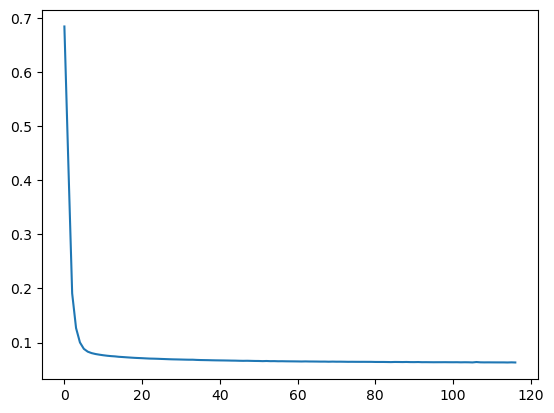

In [41]:
plt.plot(mlp.loss_curve_)

In [42]:

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.986     0.992     0.989      3242
           1      0.918     0.864     0.890       338

    accuracy                          0.980      3580
   macro avg      0.952     0.928     0.940      3580
weighted avg      0.980     0.980     0.980      3580



In [43]:
from sklearn.metrics import roc_auc_score
probs_1 = mlp.predict_proba(X_test_scaled)[:,1]
roc_auc_score(y_test, probs_1)

0.9797051640998872

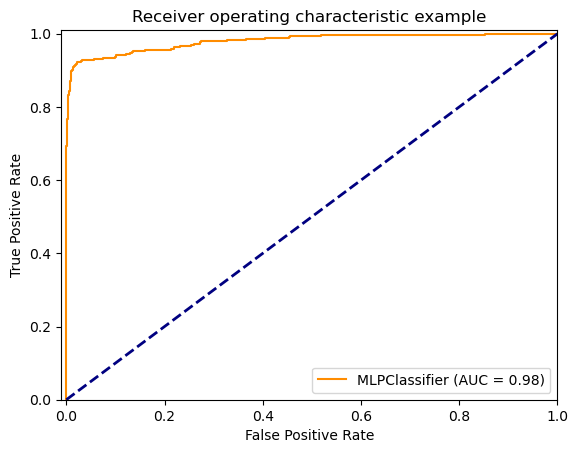

In [44]:
import matplotlib.pyplot as plt
from sklearn import metrics
metrics.plot_roc_curve(mlp, X_test_scaled, y_test, color='darkorange') 
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()